In [1]:
import pandas as pd
import altair as alt
import altair_latimes as lat

In [2]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [3]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [4]:
pitches = pd.read_csv("./input/curveballs.csv")

In [5]:
pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 89 columns):
pitch_type                         40000 non-null object
game_date                          40000 non-null object
release_speed                      40000 non-null float64
release_pos_x                      40000 non-null float64
release_pos_z                      40000 non-null float64
player_name                        40000 non-null object
batter                             40000 non-null int64
pitcher                            40000 non-null int64
events                             9445 non-null object
description                        40000 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               40000 non-null int64
des                                9445 non-null 

In [6]:
pitches.release_speed.describe()

count    40000.000000
mean        78.397397
std          3.684543
min         48.600000
25%         76.000000
50%         78.600000
75%         81.000000
max         90.100000
Name: release_speed, dtype: float64

In [7]:
pitches.release_spin_rate.describe()

count    39440.000000
mean      2489.446450
std        298.224008
min        466.000000
25%       2294.000000
50%       2478.000000
75%       2694.000000
max       3572.000000
Name: release_spin_rate, dtype: float64

In [32]:
pitches['player_name'] = pitches.player_name.apply(
    lambda x: x if x == 'Blake Snell' else 'Everybody else'
)

In [33]:
analysis_set = pitches[(pitches.release_speed > 65) & (pitches.release_spin_rate > 1500)]

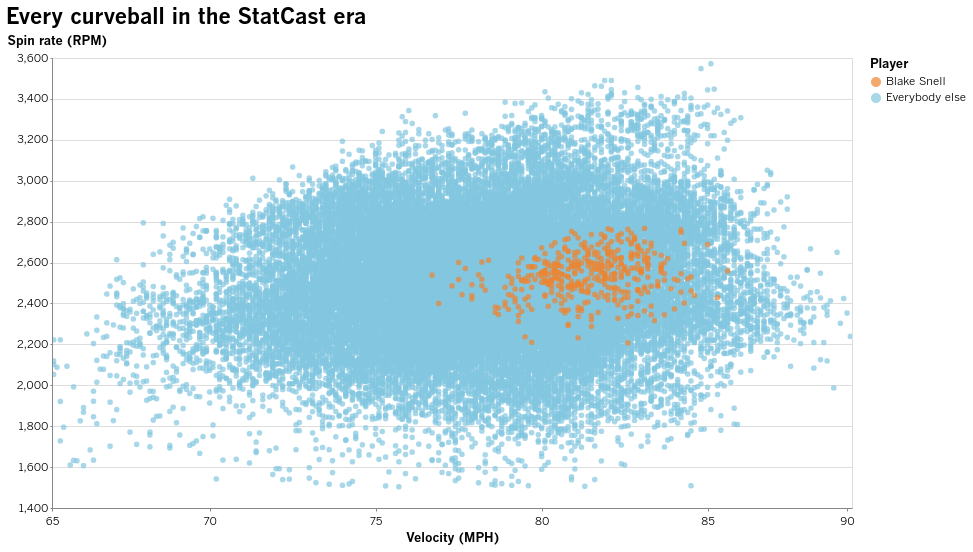

In [35]:
dots1 = alt.Chart(analysis_set[analysis_set.player_name != 'Blake Snell']).mark_circle(clip=True).encode(
    x=alt.X(
        "release_speed:O",
        title="Velocity (MPH)",
        axis=alt.Axis(values=[65, 70, 75, 80, 85, 90])
    ),
    y=alt.Y(
        "release_spin_rate:Q",
        title="Spin rate (RPM)",
        scale=alt.Scale(zero=False, domain=[1500, 3600])
    ),
    color=alt.Color(
        "player_name:N",
        title="Player",
        scale=alt.Scale(
            domain=['Blake Snell', 'Everybody else'],
            range=[lat.palette['highlight'], lat.palette['default']]
        )
    )
)

dots2 = alt.Chart(analysis_set[analysis_set.player_name == 'Blake Snell']).mark_circle(clip=True).encode(
    x=alt.X(
        "release_speed:O",
        title="Velocity (MPH)",
        axis=alt.Axis(values=[65, 70, 75, 80, 85, 90])
    ),
    y=alt.Y(
        "release_spin_rate:Q",
        title="Spin rate (RPM)",
        scale=alt.Scale(zero=False, domain=[1500, 3600])
    ),
    color=alt.Color(
        "player_name:N",
        title="Player",
        scale=alt.Scale(
            domain=['Blake Snell', 'Everybody else'],
            range=[lat.palette['highlight'], lat.palette['default']]
        )
    )
)

(dots1 + dots2).properties(
    title="Every curveball in the StatCast era",
    width=800,
)